In [34]:
from ndslib.config import jupyter_startup
jupyter_startup()

# Import libraries 
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, confusion_matrix, roc_curve, auc
import matplotlib.pyplot as plt

# Sample data
homework1 = np.array([[1.2, 3.1, 0], [2.4, 1.8, 1], [0.8, 2.9, 0], [3.3, 3.7, 1], [1.5, 2.2, 0], [2.7, 4.1, 1]])
x1 = homework1[:,0]
x2 = homework1[:,1]
y = np.array(homework1[:,2])

# Shape data 
data = {
    'x1': x1,
    'x2': x2,
}

X = pd.DataFrame(data)
Y = pd.Series(y)

# Create model
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, random_state=42)
log_reg = LogisticRegression()
log_reg.fit(X_train, Y_train)

y_pred = log_reg.predict(X_test)

coefficients = log_reg.coef_[0] 
intercept = log_reg.intercept_[0] 

# Print equation
equation = "log-odds = "

for i, feature in enumerate(X.columns):
    equation += f" ({coefficients[i]:.2f} * {feature})"
    if i < len(X.columns) - 1:  # Only add "+" if it's not the last coefficient
        equation += " +"
    
equation += f" {intercept:.2f} "
    
print(equation)

log-odds =  (0.83 * x1) + (0.64 * x2) -3.80 


In [32]:
# Calculate Accuracy and AUC-ROC Curve
accuracy = accuracy_score(Y_test, y_pred)
print(f"Accuracy: {accuracy:.2f}")

y_proba = log_reg.predict_proba(X_test)[:, 1]  # Probability of the positive class (1)

# Calculate the ROC curve
fpr, tpr, thresholds = roc_curve(Y_test, y_proba)

# Calculate the AUC (Area Under the Curve)
roc_auc = auc(fpr, tpr)
print(f"AUC: {roc_auc:.2f}")


Accuracy: 0.50
AUC: 1.00


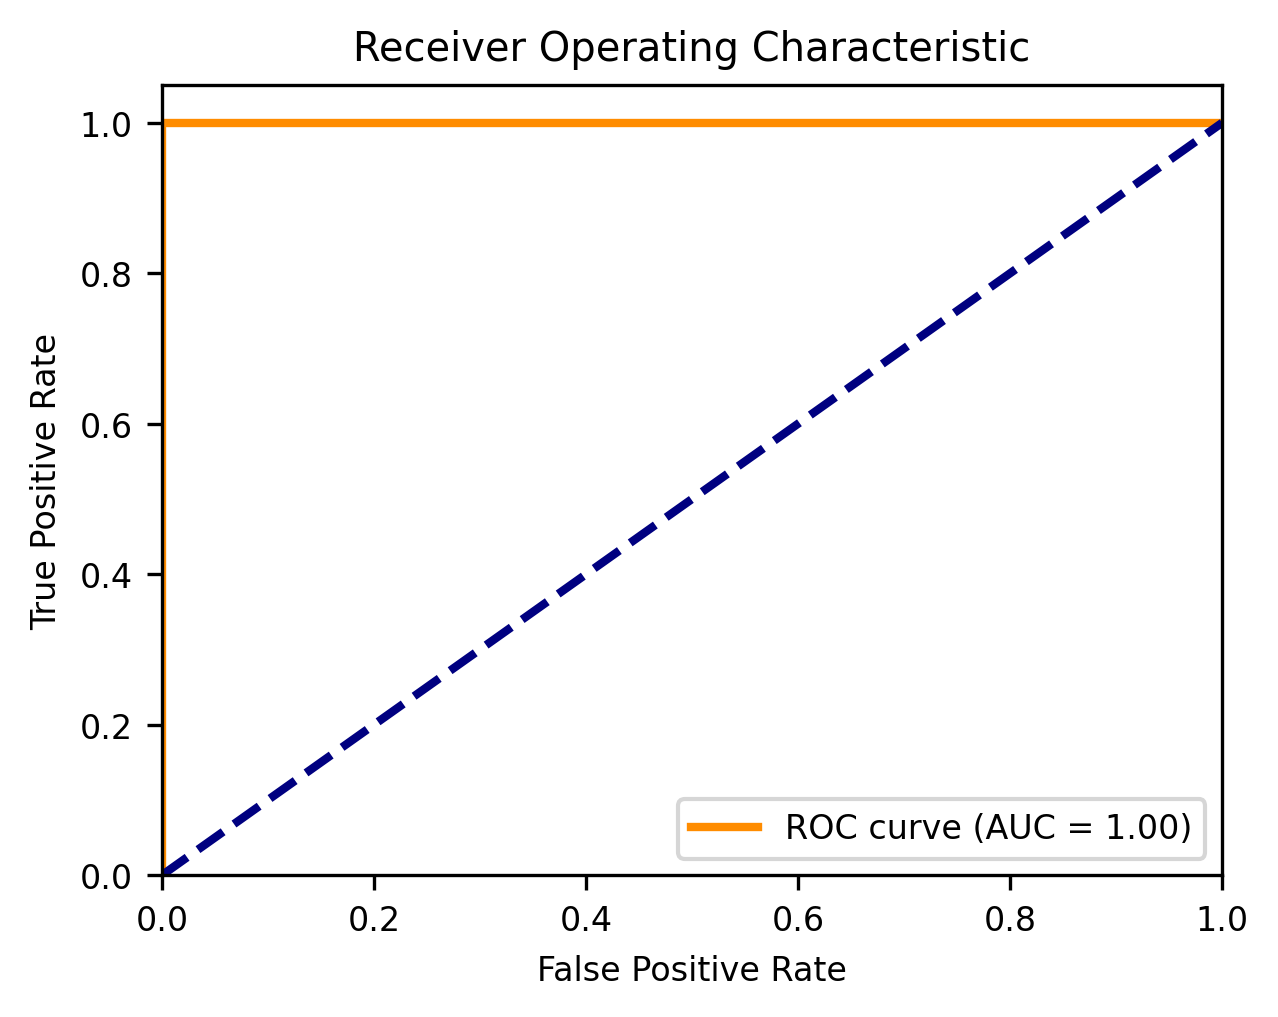

In [35]:
# Plot the ROC curve
plt.figure()
plt.plot(fpr, tpr, color='darkorange', lw=2, label=f'ROC curve (AUC = {roc_auc:.2f})')
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')  # Diagonal line (random classifier)
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic')
plt.legend(loc='lower right')
plt.show()